In [1]:
# Visualize the results from a pde1bvp_pinn.py run.

In [2]:
from importlib import import_module
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys

In [3]:
# Specify the run ID (aka problem name).
runid = "transport"

# Add the subdirectory for the problem to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition.
p = import_module(runid)

# Read the run hyperparameters.
import hyperparameters as hp

In [4]:
# Load the training and validation points.
xy_train = np.loadtxt(os.path.join(runid, "xy_train.dat"))
xy_val = np.loadtxt(os.path.join(runid, "xy_val.dat"))

In [5]:
# Format the axis labels.
xx = np.linspace(0, 1, hp.nx_train)
x_labels = ["%.1f" % x for x in xx]
y_labels = ["%.1f" % y for y in xx]

In [6]:
# Load the loss function histories.
losses = np.loadtxt(os.path.join(runid, "losses.dat"))
# losses_in = np.loadtxt(os.path.join(runid, "losses_in.dat"))

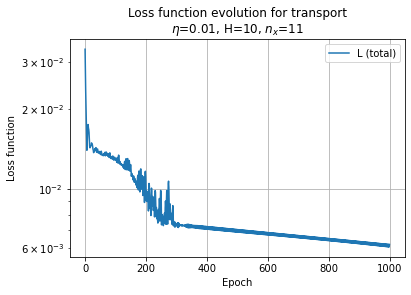

In [7]:
# Plot the loss function histories.
plt.semilogy(losses, label="L (total)")
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.title("Loss function evolution for %s\n$\eta$=%s, H=%s, $n_x$=%s" %
          (runid, hp.learning_rate, hp.H, hp.nx_train))
plt.show()

In [8]:
# Load the trained and validation Y-values.
Y_train = np.loadtxt(os.path.join(runid, "Y_train.dat"))
Y_val = np.loadtxt(os.path.join(runid, "Y_val.dat"))


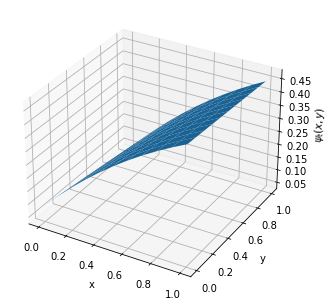

In [9]:
# For surface plotting, reshape as (n_x, n_y), then transpose.
Z = Y_train.reshape((hp.nx_train, hp.ny_train)).T
x_train = np.linspace(0, 1, hp.nx_train)
y_train = np.linspace(0, 1, hp.ny_train)
# Plot the trained solution at the training points.
fig = plt.figure()
(X, Y) = np.meshgrid(x_train, y_train)
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\psi_t(x,y)$')
plt.show()

2022-05-19 16:31:09.325261: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


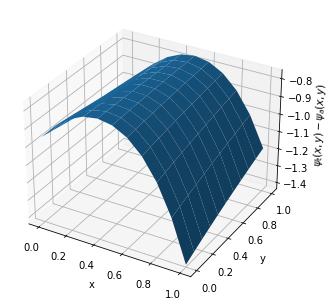

RMSE = 0.9299205024809075


In [10]:
# If solution available, plot the error in the trained z-values.
n_train = len(xy_train)
if p.analytical_solution is not None:
    Y_analytical = p.analytical_solution(xy_train).numpy().reshape(n_train,)
    Y_error = Y_train - Y_analytical
    rmse = np.sqrt(np.sum(Y_error**2)/len(Y_error))
    Z = Y_error.reshape((hp.nx_train, hp.ny_train)).T
    (X, Y) = np.meshgrid(x_train, y_train)
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('$\psi_t(x,y) - \psi_a(x,y)$')
    plt.show()
    print("RMSE = %s" % rmse)